In [1]:
from src.data_loader import load_california_housing
from src.pipeline import build_pipeline, train_and_evaluate, validation_ridge,validation_lasso
from src.preprocessing import split_data,handle_outliers, remove_multicolinearity, evaluate_train_test

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=load_california_housing()
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
pipeline=build_pipeline()


In [4]:
df_copy=df.copy()

df_copy_handle_outliers=handle_outliers(df_copy)

removed_df=remove_multicolinearity(df_copy_handle_outliers)

df_final=df[removed_df.columns.tolist()+ ["MedHouseVal"]]

Eliminado Longitude con VIF = 757.37
Eliminado AveRooms con VIF = 49.10
Eliminado Latitude con VIF = 43.04
Eliminado AveOccup con VIF = 12.07


In [5]:
X_train,X_test,y_train,y_test=split_data(df_final)

In [6]:
metrics,trained_pipeline=train_and_evaluate(pipeline,X_train,X_test,y_train,y_test)

In [7]:
print(metrics)

{'MSE': 0.6607137187894276, 'RMSE': 0.812842985323382, 'R2': 0.49579579370985893}


In [8]:
metrics,y_predict_train, y_predict_test= evaluate_train_test(pipeline,X_train,X_test,y_train,y_test)

In [9]:
print(metrics)

{'Train': {'MSE': 0.6497472076383095, 'RMSE': 0.8060689844165383, 'R2': 0.5139453935529438}, 'Test': {'MSE': 0.6607137187894276, 'RMSE': 0.812842985323382, 'R2': 0.49579579370985893}}


In [10]:
def plot_y_true_vs_y_predict(y_true,y_predict,title="y_true vs y_predict"):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true,y_predict,alpha=0.4,color="blue", label="predicciones")
    plt.plot([y_true.min(),y_true.max()],
             [y_true.min(), y_true.max()],
             color="red", linestyle="--", label="ideal")
    plt.xlabel("Valores reales (y_true)")
    plt.ylabel("Valores predichos (y_pred)")
    plt.title(title)
    plt.legend()
    plt.show()

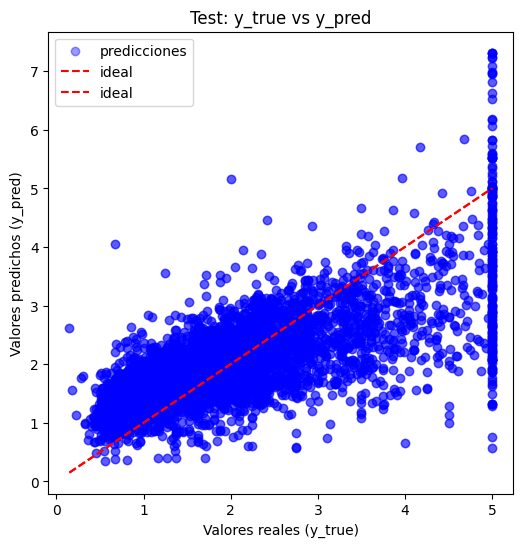

In [11]:
plot_y_true_vs_y_predict(y_test, y_predict_test, title="Test: y_true vs y_pred")

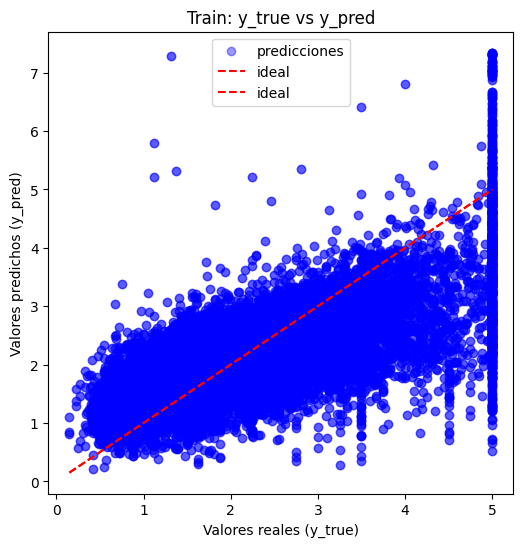

In [12]:
plot_y_true_vs_y_predict(y_train, y_predict_train, title="Train: y_true vs y_pred")

In [13]:
coef = trained_pipeline.named_steps["model"].coef_


coef = coef.flatten() if coef.ndim > 1 else coef

features = X_train.columns
for f, c in zip(features, coef):
    print(f"{f}: {c:.4f}")


MedInc: 0.8284
HouseAge: 0.2351
AveBedrms: 0.0131
Population: 0.0416


In [17]:
X_train,X_test,y_train,y_test=split_data(df)

In [18]:
ridge_model = validation_ridge(X_train, y_train)

Mejor alpha Ridge: 10.0


In [19]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (16512, 8)
y_train shape: (16512,)


In [20]:
lasso_model=validation_lasso(X_train,y_train)

Mejor alpha Lasso: 0.01


In [21]:
metrics,y_predict_train, y_predict_test= evaluate_train_test(ridge_model,X_train,X_test,y_train,y_test)

In [22]:
print(metrics)

{'Train': {'MSE': 0.5179417369316771, 'RMSE': 0.7196816913967432, 'R2': 0.6125447494851415}, 'Test': {'MSE': 0.5550405537343011, 'RMSE': 0.7450104386747216, 'R2': 0.5764371559180015}}


In [23]:
metrics,y_predict_train, y_predict_test= evaluate_train_test(lasso_model,X_train,X_test,y_train,y_test)

In [24]:
print(metrics)

{'Train': {'MSE': 0.5235978023319754, 'RMSE': 0.7236005820423138, 'R2': 0.6083136321985072}, 'Test': {'MSE': 0.5444491581246519, 'RMSE': 0.7378679815011977, 'R2': 0.5845196673976368}}


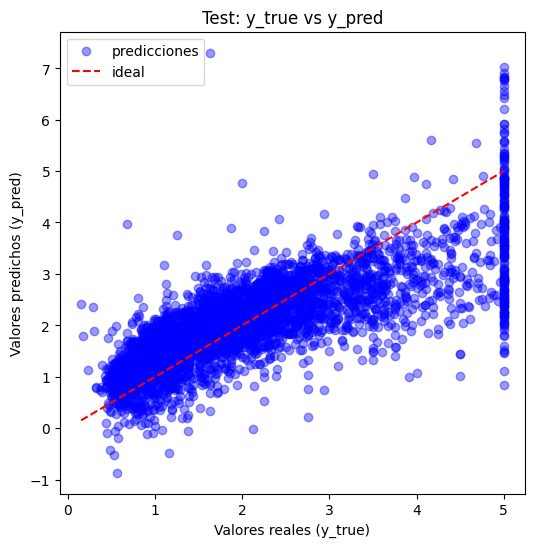

In [25]:
plot_y_true_vs_y_predict(y_test, y_predict_test, title="Test: y_true vs y_pred")